# Project 3 on Data Analytics by sukrit jaidee 6170306321
**A Machine-Learning Approach for Regional Photovoltaic Power Forecasting
<br>Introduction
** <font color='green'>
<br>What to Forecast  ? => project นี้จะพยากรณ์  Solar Power generation
<br>Why Solar ? => เพราะ solar เป็น clean energy ไม่ทำลายสิ่งแวดล้อม แต่ solar เป็นพลังงานที่มีความแปรปวนขึ้นอยู่กับสภาพอากาศ และ 20% ถึง 40% Renewable energy สูญเสียไปเนื่องจากความแปรปวน 
<br>Why to Forecast?  => Grid Stability
<br>When to Forecast? : พยากรณ์ล่วงหน้า 1 วัน สำหรับ Scheduling และ Supply
 <br>Where to Forecast? :  Plant level (same IPP)
<br> How? => โดยการใช้ Numerical Weather Prediction(NWP) + machine learning**</font>

**ขั้นตอนการ Implement**
1. ติดตั้งและ import libraries ที่จำเป็น
2. download data จาก google drive ของผม
3.  Convert netcdf4 to dictionary โดยที่ฟังก์ชัน netcdf4_to_dict เป็นฟังก์ชันที่ทำหน้าที่เปลี่ยน format ของข้อมูลจาก netcdf4 เป็น dict(python) <br>ก่อนอื่นของอธิบายก่อนว่าข้อมูล ข้อมูลที่อยู่ format netcdf4 จะประกอบไปด้วยหลายๆ object ตามที่อธิบายใน **ref[1]** แต่ obect ที่เราจะพิจารณาในขั้นตอนนี้จะเป็น object **variables**  ซึ่งภายใน object variables ก็ประกอบไปด้วยหลายๆ object อีกได้แก่ time, intTime, lat, lon,  ens,  fhour,  intValidTime(time,fhour),  myfeature(พีเจอร์ที่เรากำลังพิจารณา) (time,ens,fhour,lat,lon) ซึ่งในขั้นตอนนี้เราจะสนใจใน myfeature ซึ่งใน myfeature ก็จะประกอบไปด้วยหลายๆ object อีกคือ time, ens, fhour, lat, lon ซึ่งเป็นสิ่งที่เรากำลังจะพิจารณาในขั้นตอนนี้ ขอเขียนการเข้าถึงให้ดูอีกครั้งเพื่อความเข้าใจ ไพล์ netcdf4 =>  variables => myfeature =>  (time,ens,fhour,lat,lon) 
<br> ต่อมามาดูที่ dimension ของ myfeature มันมี 5 dimension ดังนี้ ('time', 'ens', 'fhour', 'lat', 'lon') = (5113, 11, 5, 9, 16) โดยที่ 
<br>**time** คือเวลา มีทั้งหมด 5113 วัน ก็คือเป็นข้อมูลตั้งแต่ 1994-2007 (14 ปี), 
<br> **ens** คือ โมเดล nwp มีทั้งหมด 11 โมเดล,
<br> **fhour** คือ forecast hours มีทั้งหมด 5 แบบ,
<br> **lat** คือ  latitudes ประกอบไปด้วย 9 ค่าด้วยกัน คือ 31, 32, 33, 34, 35, 36, 37, 38, 39
<br> **lon** คือ longitudes ประกอบไปด้วย 16 ค่าด้วยกัน คือ  254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269
<br>พอเข้าใจแล้วนะครับ งั้นมาต่อกันที่ step3 
<br> สิ่งที่ฟังก์ชันนี้ทำจะประกอบไปด้วย 3 อย่างด้วยกันคือเริ่มแรกฟังก์ชันนี้จะทำการวน 2 for loop เพื่อสร้าง list ของตำแหน่งต่างๆจาก  lat และ lon ผลลัพธ์ที่ได้ก็คือ 
<br>(31,254),(31,255),....,(31,261),
<br>(32,254),(32,255),....,(32,261),
<br>(33,254),(33,255),....,(33,261),
<br>.
<br>.
<br>(39,254),(39,255),....,(39,261),
<br>หมายความว่าในแต่ละรอบของการวน loop จะเป็นการสร้าง 1 ตำแหน่ง เช่น รอบที่ 1 จะเป็นการสร้าง (31,254) เป็นต้น ดังนั้นเราจะวน loop ทั้งหมด 9*16 = 144 รอบ 
<br>ยกตัวอย่างรอบที่ 1 : 
<br> - (lat, lon) = (31,254)
<br> - ('time', 'ens', 'fhour', 'lat', 'lon')  = ('time', 'ens', 'fhour', '31', '254') ก็คือเราจะได้ค่าของ time', 'ens', 'fhour ที่ตำแหน่ง (31,254) มา dimension ก็จะกลายเป็น  ('time', 'ens', 'fhour') = (5113, 11, 5) 
<br> - หลังจากนั้นเราจะหาค่า medien ของทั้ง 11 โมเดล ใน dimension ที่ ทำให้หลังจากหาค่า medien ของทั้ง 11 โมเดลเสร็จ list ที่ได้จะเป็น list ที่เกิดจากการหา medien ของทั้ง 11 โมเดล และ dimension ที่เหลือตอนนี้คือ ('time', 'fhour') = (5113, 5) 
<br> - ต่อมาเราจะทำการหาค่า medien ของทั้ง  5 fhour หลังจากหา medien dimension ที่ได้ก็คือ ('time') = (5113) 
<br>ก็คือเราจะได้ค่าของ feature ที่เราสนใจออกมาซึ่งก็คือค่า feature ที่เกิดจากการหาค่า medien ของทั้ง 11 โมเดล และ เกิดจากการหาค่า medien ของทั้ง 5 forecasthour ยกตัวอย่างถ้าเป็น temp feature เราก็จะได้ค่า temp feature ที่มากจากการหา medien ของทั้ง 11 โมเดล และ 5 forecast hour 
<br>หลังจากนั้นเขาจะทำกา่รจากนั้นจะสร้าง dictionary ที่มี key เป็น (lat, lon) และ value ที่เป็นค่าของ feature ที่ได้จากการหา medien โอเคจบ step 3 เหนื่อยจริงๆ
4.  เรา่จะทำการโหลด feature ที่จะใช้ในการพยากณณ์จาก  google drive เรา แล้วทำการแปลง feature ทั้งหมดในข้อ 3 ให้เป็น dictionary ที่มี key เป็น (lat, lon) และ value เป็นค่าที่เกิดจากการหา medien โดยใช้ฟังก์ชั่นที่ได้จากขั้นตอนที่  3
5. ขั้นตอนนีจะเป็นการ macth (lat, lon) ของ weather station จริง เข้ากับ (lat, lon) ของข้อมูลพยากรณ์อากาศที่ใกล้ที่สุดที่เกิดจาก nwp model กล่าวคือ ตอนนี้เรามี (lat, lon) ของ  weather station จริงซึ่งเป็นที่ตั้งของ solar farm จริงๆ ที่ซึ่ง solar farm นี้จะผลิตพลังงานไฟฟ้าออกมา แต่ที่ solar farm แต่ละ station ในโปรเจ็คนี้ไม่มีค่าของ weather data เราเลยใช้ nwp model (ซี่งก็คือโมเดลที่ให้ค่าพยากณณ์อากาศแต่ละจุดออกมา โมเดลนี้เป็น model ของโลกคือโมเดลนี้จะให้ค่าพยากรณ์อากาศทั่วทั้งโลกขึ้นอยู่กับว่าเราจะพิจารณาที่ตำแหน่งไหนของโลก ในโปรเจ็คนี้พิจารณาที่ (lat,lon) ที่่ให้ดังขั้นตอนที่ผ่านมา) แต่มีปัญหาตรงที่เราจะต้องเลือกว่าเราจะเอาค่าพยากรณ์ที่ตำแหน่งไหนมาให้กับ station จริงของเรา
<br>โดยวิธีการทำก็คือเราจะสร้าง dictionary ที่เป็น list ของรายชื่อ feature ที่จะใช้ในการพยากรณ์ ซึ่งเราจะเห็นว่า ข้อมูลพยากรณ์อากาศที่ได้จาก nwp model มีการกระจายตัวทีมากกว่า ตำแหน่งของ solar farm จริงๆ ดังนั้นเราจะ matching ตำแหน่งของ solar farm ไปยัง ตำแหน่งพยากรณ์อากาศที่เกิดจาก nwp model โดยการ แต่ๆๆๆ เดี๋ยวก่อนลืมบอกไปว่า ค่า (lat,lon) ของ ตำแหน่ง solar farm จริงๆ มีความไม่เป็นเลขทศนิยมไม่ได้เป็นเลขจำนวนเต็ม และเนื่องจากการกระจายตัวของค่าพยากณ์ของ nwp model มีการกระจายตัวที่มากกว่าดังนั้นในการที่เราจะ match ค่า (lat,lon) ของ solar farm จริงๆไปยัง ตำแหน่งของ nwp model เราก็แค่เปลี่ยน (lat,lon) ของ solar farm จริงๆ ไปเป็นเลขจำนวนเต็มก็จะได้แล้วว่าจะเอาค่าพยากรณ์อากาศที่ไหนมาให้กับ station นี้ แต่ๆๆๆ วิธีการนี้อาจเป็นวิธีการที่ไม่ดี ยังมีวิธีที่ดีกว่านี้อีก เช่น inverse distance weighting(IDW) หรือจะเป็น Kriging หรือจะเป็น clustering
<br> โดยขั้นตอนนี้เราจะทำการโหลดข้อมูลเกี่ยวกับ solar farm มาซี่งประกอบไปด้วย feature ต่างๆดังนี้
<br> - stid คือ ชืื่อของ solar farm site
<br> - nlat คือ  latitude
<br> - elon คือ  longitude
<br> - elev คือ ระดับความสูง
<br> และทำการ convert ค่า lat, lon ของ solar farm ไปเป็นค่าตัวเลขจำนวณเต็ม หรือ integer เพื่อที่จะได้ match เข้ากับค่าพยากรณ์อากาศจาก mwp model
<br> สร้าง ฟังก์ชัน station_dic จะทำการสร้าง dictionary ที่มี key เป็น (lat,lon)  ของแต่ละ solar farm และ value เป็น feature ที่เราสนใจ ณ ตำแหน่ง (lat,lon)  ของแต่ละ solar farm นั้น หลังจากนั้นเราจะทำการสร้าง สร้าง dictionary ของทุกๆ feature สำหรับทุกๆ solar farm 
6. โหลดไพล์ train.csv ซึ่งเป็นไพล์ที่ประกอบไปด้วยค่า power ของ solar farm แต่ละแห่ง ในแต่ละวัน ซึ่งเรามี solar farm ทั้งหมด 98 ที่ หลังจากนั้น เปลี่ยน date ที่อยู่ในรูปแบบ integer ให้อยู่ในรูปแบบ pandas date time
7. แบ่ง label ของเราซึ่งก็คือค่า power แต่ละ solar far ออกเป็น 3 ชุด คือ
<br>  shape ของ label ทั้งหมดของเราคือ (5112,99)
<br>0-1704 shape คือ (1704, 99)
<br>1704-3408 shape คือ (1704, 99)
<br>3408-5112 shape คือ (1704, 99)
<br>หลังจากนั้นเราจะ drop cloumn (elev) ซึ่งเป็นระดับความสู้ของแต่ละ solar farm ทิ้ง และ convert จาก <br>dataframe ไปเป็น dictionary ที่มี key เป็น ชื่อของ solar farm station สิ่งที่ได้ก็คือ
<br> key ('ACME') => [34, 261]
<br> key ('ADAX') => [34, 263]
<br>.
<br>key ('WYNO') =>[36, 263]
<br> เป็นต้น
<br> หลังจากนั้นเราจะสร้างฟังก์ชัน  station_feature หน้าที่ของฟังก์ชันนี้ก็คือ  ก่อนอื่นของอธิบาย parameter ก่อน
 <br>.
<br> - **stn_feat 1-15** คือค่าของ feature ในแต่ละ solar farm ที่มี key เป็น (lat,lon)  ของแต่ละ solar farm 
<br>และ value เป็น feature ที่เราสนใจ ณ ตำแหน่ง (lat,lon)  ของแต่ละ solar farm นั้น
<br> key (lat,lon) => ค่าของ feature ที่เราสนใจ ณ ตำแหน่ง (lat,lon)  ของแต่ละ solar farm นั้น
<br>.
<br> - **stn_dict** คือ  dictionary(stn_dict) ที่มี key เป็น ชื่อของ solar farm station และ value เป็นค่า (lat, lon) ของ solar farm นั้น
 <br> key ('ACME') => value (lat,lon)
  <br>.
<br> start คือ จะเริ่มที่ sample ที่เท่าไรของข้อมูล
<br> end คือ เอาข้อมูลถึง sample ที่เท่าไร
<br> stid คือ ชื่อของ solar farm station
<br>โดยฟังก์ชันนี้จะ return ค่าของ feature ณ ตำแหน่ง lat/lon ของ solar farm นั้นออกมา
<br>เย้ ได้ค่าของ feature ที่ตำแหน่ง ACME solar farm  ออกมาแล้ว
8. ทำการพยากรณ์ power ที่ ACME solar farm หลังจากนั้น สร้างตัวแปร target (mesonet)  ซี่งก็คือค่า  power ที่  "ACME" station หลังจากนั้น ให้ X  คือ dataframe ของ feature ต่างๆ ที่ "ACME" solar farm station หลังจากนั้นทำการ  Standardize variables ให้อยู่ในช่วง 0-1  และแบ่งข้อมูลออกเป็น train และ test ก็คือ X_train, X_test, y_train, y_test แล้ว train model ด้วยคำสั่ง fit หลังจากนั้น Evaluate ผลจากทั้ง train และ test data ผลที่ได้ก็คือ 
<br>Test Score 0.775
<br>Train Score 0.759
<br> ลอง Perform ที่ 5-fold cross validation
<br>Cross-validated scores: [0.7233376  0.6589547  0.83836188 0.74949864 0.59043731 0.84316504
 0.7169481  0.54446624 0.74641008 0.81398921]





**อธิบายเพิ่มเติม : ref[1]**
<br> ไพล์นามสกุล netcdf4 เป็นไพล์ในสรูปแบบของ OrderedDict (dictionary + list) เราสามารถเข้าถึง object ต่างๆได้จาก name และ index
<br>ไพล์จะประกอบไปด้วยหลายๆ object ในการเข้าถึง ได้แก่ 
<br>**Conventions** => CF-1.0
<br>**title** => จะบอกว่า data นี้คืออะไรมาจากหน่วยงานไหน เช่น  Subset of data from 2nd-generation multi-decadal ensemble reforecast generated from the NCEP
<br>**institution** => บอกเกี่ยวกับองค์กรที่ทำ เช่น NOAA Earth System Research Laboratory (ESRL)
<br>**source** => NCEP GFS v 9.01, T254L42.  Control initial conditions from CFSRR.  Perturbed initial conditions from ETR.  Model error simulated with STTP.
<br>**references** => http://www.esrl.noaa.gov/psd/forecasts/reforecast2/index.html
<br>**history** => Subset created 2013-01-15 19:17:02 UTC
<br>**comment** => Original dataset generated on DOE's supercomputers at Lawrence Berkeley Laboratory through ALCC/ASCR grant.
<br> **dimensions(sizes)** =>  time(5113), lat(9), lon(16), ens(11), fhour(5)
<br> **variables(dimensions)** => time(time), intTime(time), lat(lat), lon(lon),  ens(ens),  fhour(fhour),  intValidTime(time,fhour),  considering feature (time,ens,fhour,lat,lon)
<br>วิธีการเข้าถึงแต่ละไพล์ ชื่อไพล์.xxx(สิ่งที่ต้องการเข้าถึง)
<br>  แต่ object ที่เราสนใจและใช้ในการพยากรณ์จะมีเพียง 2 object คือ ***dimensions*** และ ***variables***
<br> ต่อไปเราจะขออธิบายโครงสร้างของ object ของ dimensions และ object ของ variables
<br> - dimensions จะประกอบไปด้วย  key ในการเข้าถึงดังต่อไปนี้ time, lat, lon, ens,fhour
<br> - variables จะประกอบไปด้วย key ในการเข้าถึงดังต่อไปนี้ time, intTime ,lat ,lon ,ens ,fhour ,intValidTime , considering feature (feature ที่เราสนใจ)
โดย Object ที่เราสนใจมากที่สุดก็คือ considering feature (feature ที่เราสนใจ) เนื่องจากจะเป็น featuren ที่เราใช้ในการพยากรณ์

# 1. Install libraries &Import Libraries

** <font color='green'>ติดตั้ง libraries netcdf4 เนื่องจากข้อมูลเราอยู่ใน format ที่เป็น netcdf4
<br> ขอมูลทางวิทยาศาสตร์ส่วนใหญ่จะเก็บในรูปแบบไพล์ netcdf4 
<br> import libraries
</font>**

In [1]:
!pip install netcdf4
import numpy as np
import netCDF4 as nc 
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data 

**<font color='green'>เชื่อมต่อไปยัง google drive ของผม และ authorization ด้วย authorization code</font>**

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Convert netcdf4 to dictionary**

<br><font color='green'> **ฟังก์ชัน netcdf4_to_dict **
<br>ฟังก์ชัน netcdf4_to_dict เป็นฟังก์ชันที่ทำหน้าที่เปลี่ยน format ของข้อมูลจาก netcdf4 เป็น dictionary
<br> ที่มี key เป็น (lat, lon) และ value คือค่าของ feature ที่เราสนใจที่เกิดจากการหา medien ของทั้ง 11 โมเดล และ medien ของทั้ง 5 forecast hour 
<br> มีทั้งหมด 114 samples ดังนัั้น 
<br>  key = (31,254), value = xx(ค่าของ feature ที่เกิดจากการหา medien)
<br>  key =(31,255), value = xx
<br>.
<br> key =(39,261), value = xx
<br>สามารถอ่านรายละเอียดมากกว่านี้ได้จากด้านบน
</font>

In [0]:
def netcdf4_to_dict(data_nc):
    import timeit
    start = timeit.default_timer()
    data = data_nc.variables.values()[-1]
    c_list=[]
    c_dict={}

    for l in lat_len:
        for n in lon_len:
            lat_lon.append(np.column_stack((lat[l],lon[n])))
   
            temp = list(data[:,:,:,l,n])
            pcp = np.median(temp, axis=1) 
            pcp_av = np.median(pcp,axis=1) 
            c_list.append([[int(lat[l]),int(lon[n])],pcp_av])
    
    for n in range(len(c_list)):
        k = tuple(c_list[n][0])
        v = c_list[n][1]
        c_dict[k] = [v]
    stop = timeit.default_timer()
    print "Time: %d s" % (stop - start)
    return c_dict

# **4. Convert features จาก netCDF4 เป็น dict**

**<font color='green'>โหลด feature ต่างๆจาก google drive</font>**
<br>Features Description Units
<br>1.apcp_sfc 3-Hour accumulated precipitation at the surface kg m-2
<br>2.dlwrf_sfc Downward long-wave radiative flux average at the surface W m-2
<br>3.dswrf_sfc Downward short-wave radiative flux average at the surface W m-2
<br>4.pres_msl Air pressure at mean sea level Pa
<br>5.pwat_eatm Precipitable Water over the entire depth of the atmosphere kg m-2
<br>6.spfh_2m Specific Humidity at 2 m above ground kg kg-1
<br>7.tcdc_eatm Total cloud cover over the entire depth of the atmosphere %
<br>8.tcolc_eatm Total column-integrated condensate over the entire atmos. kg m-2
<br>9.tmax_2m Maximum Temperature over the past 3 hours at 2 m above the ground K
<br>10.tmin_2m Mininmum Temperature over the past 3 hours at 2 m above the ground K
<br>11.tmp_2m Current temperature at 2 m above the ground K
<br>12.tmp_sfc Temperature of the surface K
<br>13.ulwrf_sfc Upward long-wave radiation at the surface W m-2
<br>14.ulwrf_tatm Upward long-wave radiation at the top of the atmosphere W m-2
<br>15.uswrf_sfc Upward short-wave radiation at the surface W m-2




In [0]:
#Average Temperature at surface
temp_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/tmp_sfc_latlon_subset_19940101_20071231.nc') 
#Average Temperature 2m above surface
temp2m_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/tmp_2m_latlon_subset_19940101_20071231.nc') 
#Minimum Temperature 2m above surface
tmin_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/tmin_2m_latlon_subset_19940101_20071231.nc') 
#Maximum Temperature 2m above surface
tmax_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/tmax_2m_latlon_subset_19940101_20071231.nc') 
#Downward long wave radiation at surface
dlwave_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/dlwrf_sfc_latlon_subset_19940101_20071231.nc')
#Downward shortwave radiation at surface
dswave_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/dswrf_sfc_latlon_subset_19940101_20071231.nc')
#Total cloud cover
cloud_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/tcdc_eatm_latlon_subset_19940101_20071231.nc')
#Precipiation at surface
precip_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/apcp_sfc_latlon_subset_19940101_20071231.nc')
#Precipitable water over depth of atmosphere
pwat_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/pwat_eatm_latlon_subset_19940101_20071231.nc')
#Specifc humidity
humid_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/spfh_2m_latlon_subset_19940101_20071231.nc')
#Total condensation
conden_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/tcolc_eatm_latlon_subset_19940101_20071231.nc')
#Upward Longwave radiation at surface
ulwave_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/ulwrf_sfc_latlon_subset_19940101_20071231.nc')
#Upward longwave radiation at atmoshpere
ulwave_atm_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/ulwrf_tatm_latlon_subset_19940101_20071231.nc')
#Upward shortwave radiaiton at surface
uswave_nc = nc.Dataset('/content/drive/My Drive/Regional_forecasts/gefs_train/train/uswrf_sfc_latlon_subset_19940101_20071231.nc')
#pres_msl Air pressure at mean sea level Pa
press_nc = nc.Dataset("/content/drive/My Drive/Regional_forecasts/gefs_train/train/pres_msl_latlon_subset_19940101_20071231.nc") 

**<font color='green'>แปลง feature เหล่านี้เป็น dictionary </font>**
<br>temp_nc, temp2m_nc, tmin_nc, tmax_nc, 
<br>dlwave_nc, dswave_nc, ulwave_nc, ulwave_atm_nc, uswave_nc,
<br>cloud_nc, precip_nc, pwat_nc, humid_nc, conden_nc, Press_dict

In [0]:
lat_lon =[]
p_list =[]
press_dict = {}
lat = press_nc.variables['lat']
lon = press_nc.variables['lon']
lat_len = list(range(len(lat)))
lon_len = list(range(len(lon)))

In [12]:
import timeit
start = timeit.default_timer()

Temp_dict = netcdf4_to_dict(temp_nc)
Temp2m_dict = netcdf4_to_dict(temp2m_nc)
Tmin_dict = netcdf4_to_dict(tmin_nc)
Tmax_dict = netcdf4_to_dict(tmax_nc)

Dlwave_dict = netcdf4_to_dict(dlwave_nc)
Dswave_dict = netcdf4_to_dict(dswave_nc)
Ulwave_dict = netcdf4_to_dict(ulwave_nc)
Ulwave_atm_dict = netcdf4_to_dict(ulwave_atm_nc)
Uswave_dict = netcdf4_to_dict(uswave_nc)

Cloud_dict = netcdf4_to_dict(cloud_nc)
Precip_dict = netcdf4_to_dict(precip_nc)
Pwat_dict = netcdf4_to_dict(pwat_nc)
Humid_dict = netcdf4_to_dict(humid_nc)
Conden_dict = netcdf4_to_dict(conden_nc)
Press_dict = netcdf4_to_dict(press_nc)


stop = timeit.default_timer()
print "Time: %d s" % (stop - start)

Time: 37 s
Time: 39 s
Time: 38 s
Time: 39 s
Time: 39 s
Time: 34 s
Time: 38 s
Time: 38 s
Time: 34 s
Time: 38 s
Time: 36 s
Time: 41 s
Time: 41 s
Time: 49 s
Time: 35 s
Time: 582 s


# **5.Match weather station lat/lon to the nearest lat/lon in our forecast data**

**<font color='green'>สร้าง list ที่ประกอบไปด้วยชื่อของ feature ต่างๆที่ใช้ในการพยากรณ์</font>**

In [16]:
dict_list =['Temp_dict','Temp2m_dict','Tmin_dict','Tmax_dict','Dlwave_dict','Dswave_dict','Ulwave_dict',
            'Ulwave_atm_dict','Uswave_dict','Cloud_dict','Precip_dict','Pwat_dict','Humid_dict','Conden_dict']
dict_list

['Temp_dict',
 'Temp2m_dict',
 'Tmin_dict',
 'Tmax_dict',
 'Dlwave_dict',
 'Dswave_dict',
 'Ulwave_dict',
 'Ulwave_atm_dict',
 'Uswave_dict',
 'Cloud_dict',
 'Precip_dict',
 'Pwat_dict',
 'Humid_dict',
 'Conden_dict']

**<font color='green'>โหลดตำแหน่ง(lat, lon) ของ solar farm จริงๆมา
<br>ในไพล์ station_info_add_360.csv จะประกอบไปด้วย 4 feature
<br>1. stid คือ ชืื่อของ solar farm site
<br>2. nlat คือ  latitude
<br>3. elon คือ  longitude
<br>4. elev คือ ระดับความสูง
</font>**


In [17]:
station_csv = ('/content/drive/My Drive/Regional_forecasts/station_info_add_360.csv')
station = pd.read_csv(station_csv)
station.head(1)

,stid,nlat,elon,elev
0,ACME,34.80833,261.97675,397


**<font color='green'>Convert ตำแหน่ง lat/lon ของ solar farm ไปเป็นเลข integers เพื่อที่จะ match มันเข้ากับตำแหน่ง lat/lon ของค่าพยากณณ์อากาศที่ได้จาก nwp model</font>**

In [18]:
station.nlat = station.nlat.astype(int)
station.elon = station.elon.astype(int)
station.head(2)

,stid,nlat,elon,elev
0,ACME,34,261,397
1,ADAX,34,263,295


**<font color='green'>สร้าง ฟังก์ชัน station_dic จะทำการสร้าง dictionary ที่มี key เป็น (lat,lon)  ของแต่ละ solar farm และ 
<br>value เป็น feature ที่เราสนใจ ณ ตำแหน่ง (lat,lon)  ของแต่ละ solar farm นั้น</font>**



In [0]:
def station_dict(station,feature_dict):    
    stn_dict = {}
    for s in range(len(station)):
        k = tuple([station.nlat[s],station.elon[s]]) #key
        v = feature_dict[station.nlat[s],station.elon[s]] #value
        stn_dict[k] = [v]
    return stn_dict

**<font color='green'>สร้าง dictionary ของทุกๆ feature สำหรับทุกๆ solar farm </font>**

In [0]:
stn_temp = station_dict(station,Temp_dict)
stn_temp2m = station_dict(station,Temp2m_dict)
stn_tmin = station_dict(station,Tmin_dict)
stn_tmax = station_dict(station,Tmax_dict)

stn_dlwave = station_dict(station,Dlwave_dict)
stn_dswave = station_dict(station,Dswave_dict)
stn_ulwave = station_dict(station,Ulwave_dict)
stn_ulwave_atm = station_dict(station,Ulwave_atm_dict)
stn_uswave = station_dict(station,Uswave_dict)

stn_press = station_dict(station,Press_dict)
stn_cloud = station_dict(station,Cloud_dict)
stn_precip = station_dict(station,Precip_dict)
stn_pwat = station_dict(station,Pwat_dict)
stn_humid = station_dict(station,Humid_dict)
stn_conden = station_dict(station,Conden_dict)

# 6.Prepare Target Data

** <font color='green'>โหลดไพล์ train.csv ซึ่งเป็นไพล์ที่ประกอบไปด้วยค่า power ของ solar farm แต่ละแห่ง(ซี่งเป็นสิ่งที่เราต้องการที่จะพยากรณ์) ในแต่ละวัน ซึ่งเรามี solar farm ทั้งหมด 98 ที่ โดยหน่วยของกำลังจะเป็น (J m-2) </font>**


In [21]:
train_csv =  '/content/drive/My Drive/Regional_forecasts/train.csv'
y = pd.read_csv(train_csv)
print y.shape
y.head(1)

(5113, 99)


,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,VINI,WASH,WATO,WAUR,WEAT,WEST,WILB,WIST,WOOD,WYNO
0,19940101,12384900,11930700,12116700,12301200,10706100,10116900,11487900,11182800,10848300,...,10771800,12116400,11308800,12361800,11331600,10644300,11715600,11241000,10490100,10545300


** <font color='green'>เปลี่ยน date ที่อยู่ในรูปแบบ integer ให้อยู่ในรูปแบบ pandas date time</font>**

In [22]:
y['Date'] = pd.to_datetime(y['Date'], format='%Y%m%d')
y.Date.head(2)

0   1994-01-01
1   1994-01-02
Name: Date, dtype: datetime64[ns]

# 7.Setup Prediction for One Station 

<font color='green'>
แบ่ง label ของเราซึ่งก็คือค่า power แต่ละ solar far ออกเป็น 3 ชุด คือ
<br>  shape ของ label ทั้งหมดของเราคือ (5112,99)
<br>0-1704 shape คือ (1704, 99)
<br>1704-3408 shape คือ (1704, 99)
<br>3408-5112 shape คือ (1704, 99)
</font>



In [23]:

subset1 = y.iloc[:,1] #เอาทุกแถวแต่เอา col ที่ 1 อย่างเดียว ก็คือ ACME station
subset1 = y[0:1704] #เอาแถวที่ 0 ถึงแถวที่ 1704
print subset1.shape 

subset2 = y.iloc[:,1] #เอาทุกแถวแต่เอา col ที่ 1 อย่างเดียว ก็คือ ACME station
subset2 = y[1704:3408] #เอาแถวที่ 1704 ถึงแถวที่ 3408
print subset2.shape

subset3 = y.iloc[:,1] #เอาทุกแถวแต่เอา col ที่ 1 อย่างเดียว ก็คือ ACME station
subset3 = y[3408:5112] #เอาแถวที่ 3408 ถึงแถวที่ 5112
print subset3.shape
subset3.head(1)


(1704, 99)
(1704, 99)
(1704, 99)


,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,VINI,WASH,WATO,WAUR,WEAT,WEST,WILB,WIST,WOOD,WYNO
3408,2003-05-02,16656900,22253400,12807000,19178400,20463000,26210400,15944400,23589000,23049300,...,24110700,19213500,22429500,11215800,19777500,17304000,25230300,11431500,23100300,24744600


**<font color='green'>หลังจากนั้นเราจะ drop cloumn (elev) ซึ่งเป็นระดับความสู้ของแต่ละ solar farm ทิ้ง และ convert จาก <br>dataframe ไปเป็น dictionary(stn_dict) ที่มี key เป็น ชื่อของ solar farm station และ value เป็นค่า (lat,lon) ของ solar farm  นั้นสิ่งที่ได้ก็คือ**
<br> key ('ACME') => [34, 261]
<br> key ('ADAX') => [34, 263]
<br>.
<br>key ('WYNO') =>[36, 263]
<br> เป็นต้น
</font>



In [27]:
stn = station.drop('elev',1)
stn_dict = stn.set_index('stid').T.to_dict('list')
stn_dict['ACME']

[34, 261]

<font color='green'>
ฟังก์ชัน  station_feature หน้าที่ของฟังก์ชันนี้ก็คือ  ก่อนอื่นของอธิบาย parameter ก่อน
 <br>.
<br> - **stn_feat 1-15** คือค่าของ feature ในแต่ละ solar farm ที่มี key เป็น (lat,lon)  ของแต่ละ solar farm 
<br>และ value เป็น feature ที่เราสนใจ ณ ตำแหน่ง (lat,lon)  ของแต่ละ solar farm นั้น
<br> key (lat,lon) => ค่าของ feature ที่เราสนใจ ณ ตำแหน่ง (lat,lon)  ของแต่ละ solar farm นั้น
<br>.
<br> - **stn_dict** คือ  dictionary(stn_dict) ที่มี key เป็น ชื่อของ solar farm station และ value เป็นค่า (lat, lon) ของ solar farm นั้น
 <br> key ('ACME') => value (lat,lon)
  <br>.
<br> start คือ จะเริ่มที่ sample ที่เท่าไรของข้อมูล
<br> end คือ เอาข้อมูลถึง sample ที่เท่าไร
<br> stid คือ ชื่อของ solar farm station
 <br>โดยฟังก์ชันนี้จะ return ค่าของ feature ณ ตำแหน่ง lat/lon ของ solar farm นั้นออกมา
</font>




In [0]:
def station_feature(stn_feat1, stn_feat2, stn_feat3,stn_feat4,stn_feat5,stn_feat6,stn_feat7,stn_feat8,stn_feat9,
                    stn_feat10, stn_feat11, stn_feat12, stn_feat13, stn_feat14, stn_feat15,
                    stn_dict, start, end, stid='stid'):
    
    sub_feat1_stn = stn_feat1[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat2_stn = stn_feat2[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat3_stn = stn_feat3[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat4_stn = stn_feat4[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat5_stn = stn_feat5[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat6_stn = stn_feat6[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat7_stn = stn_feat7[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat8_stn = stn_feat8[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat9_stn = stn_feat9[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat10_stn = stn_feat10[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat11_stn = stn_feat11[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat12_stn = stn_feat12[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat13_stn = stn_feat13[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat14_stn = stn_feat14[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]
    sub_feat15_stn = stn_feat15[stn_dict[stid][0],stn_dict[stid][1]][0][0][start:end]

    
    return sub_feat1_stn,sub_feat2_stn,sub_feat3_stn,sub_feat4_stn,sub_feat5_stn, sub_feat6_stn,sub_feat7_stn,sub_feat8_stn,sub_feat9_stn,sub_feat10_stn, sub_feat11_stn,sub_feat12_stn,sub_feat13_stn,sub_feat14_stn,sub_feat15_stn


<font color='green'>ใช้ฟังก์ชัน station_feature(ค่าพยากรณ์อากาศต่างๆ จาก nwp model) เพื่อหาค่าของแต่ละ feature ณ ตำแหน่ง solar farm นั้นออกมา แต่ตอนนี้เราคิดที่ ACME solar farm</font> 


In [0]:
sub_press_ACME, sub_temp_ACME, sub_temp2m_ACME, sub_tmin_ACME, sub_tmax_ACME,sub_dlwave_ACME, sub_dswave_ACME, sub_ulwave_ACME, sub_ulwave_atm_ACME, sub_uswave_ACME, sub_cloud_ACME, sub_precip_ACME, sub_pwat_ACME,sub_humid_ACME, sub_conden_ACME = station_feature(stn_press,
                  stn_temp,
                  stn_temp2m,
                  stn_tmin,
                  stn_tmax,
                  stn_dlwave,
                  stn_dswave,
                  stn_ulwave,
                  stn_ulwave_atm,
                  stn_uswave,
                  stn_cloud,
                  stn_precip,
                  stn_pwat,
                  stn_humid,
                  stn_conden,
                  stn_dict,0,5113,stid='ACME')

<font color='green'>เย้ ได้ค่าของ feature ที่ตำแหน่ง ACME solar farm  ออกมาแล้ว</font>

In [38]:
print sub_press_ACME
print sub_temp_ACME
print sub_temp2m_ACME
print sub_tmin_ACME
print sub_tmax_ACME
print sub_dlwave_ACME
print sub_dswave_ACME
print sub_ulwave_ACME
print sub_ulwave_atm_ACME
print sub_uswave_ACME
print sub_cloud_ACME
print sub_precip_ACME
print sub_pwat_ACME
print sub_humid_ACME
print sub_conden_ACME

[101989.74  101313.04  102099.58  ... 102080.03  101850.875 102458.55 ]
[280.1507  282.4783  279.2167  ... 274.97382 274.41183 276.14178]
[281.05185 284.40945 280.9337  ... 277.72485 277.46707 278.19583]
[280.75497 279.35657 274.66104 ... 269.51807 271.90134 276.6831 ]
[287.06747 289.03152 280.93582 ... 279.64572 281.82736 282.37708]
[261.03827 260.19702 231.6105  ... 236.40387 230.      237.33813]
[220. 210. 220. ... 210. 220. 220.]
[362.      357.92477 340.07877 ... 321.91592 330.91162 340.32285]
[255.97485 253.53503 246.00128 ... 229.00641 246.2328  252.46622]
[51. 49. 52. ... 48. 55. 55.]
[0.   0.   0.   ... 0.03 0.   0.  ]
[0. 0. 0. ... 0. 0. 0.]
[ 8.6       10.2        6.2       ...  8.600041   4.9549904  4.468974 ]
[0.00336    0.00299    0.00277511 ... 0.00243    0.00306803 0.0019048 ]
[1.30e-03 3.00e-04 3.00e-04 ... 3.03e-02 1.00e-04 1.00e-04]


#8.Model Prediction for one station

**<font color='green'>ทำการพยากรณ์ power ที่ ACME solar farm</font>**

In [0]:
sub_press, sub_temp, sub_temp2m, sub_tmin, sub_tmax, sub_dlwave, sub_dswave, sub_ulwave, sub_ulwave_atm, sub_uswave, sub_cloud, sub_precip, sub_pwat,sub_humid, sub_conden = station_feature(stn_press,
                  stn_temp,
                  stn_temp2m,
                  stn_tmin,
                  stn_tmax,
                  stn_dlwave,
                  stn_dswave,
                  stn_ulwave,
                  stn_ulwave_atm,
                  stn_uswave,
                  stn_cloud,
                  stn_precip,
                  stn_pwat,
                  stn_humid,
                  stn_conden,
                  stn_dict,0,5113,stid = station.stid[0]) #station.stid[0] = ACME

**<font color='green'>print ค่าพยากณณ์อากาศต่างๆ ที่ ACME solar farm</font>**

In [43]:
print sub_press
print sub_temp
print sub_temp2m
print sub_tmin
print sub_tmax
print sub_dlwave
print sub_dswave
print sub_ulwave
print sub_ulwave_atm
print sub_uswave
print sub_cloud
print sub_precip
print sub_pwat
print sub_humid
print sub_conden


[101989.74  101313.04  102099.58  ... 102080.03  101850.875 102458.55 ]
[280.1507  282.4783  279.2167  ... 274.97382 274.41183 276.14178]
[281.05185 284.40945 280.9337  ... 277.72485 277.46707 278.19583]
[280.75497 279.35657 274.66104 ... 269.51807 271.90134 276.6831 ]
[287.06747 289.03152 280.93582 ... 279.64572 281.82736 282.37708]
[261.03827 260.19702 231.6105  ... 236.40387 230.      237.33813]
[220. 210. 220. ... 210. 220. 220.]
[362.      357.92477 340.07877 ... 321.91592 330.91162 340.32285]
[255.97485 253.53503 246.00128 ... 229.00641 246.2328  252.46622]
[51. 49. 52. ... 48. 55. 55.]
[0.   0.   0.   ... 0.03 0.   0.  ]
[0. 0. 0. ... 0. 0. 0.]
[ 8.6       10.2        6.2       ...  8.600041   4.9549904  4.468974 ]
[0.00336    0.00299    0.00277511 ... 0.00243    0.00306803 0.0019048 ]
[1.30e-03 3.00e-04 3.00e-04 ... 3.03e-02 1.00e-04 1.00e-04]


**<font color='green'>สร้างตัวแปร target (mesonet)  ซี่งก็คือค่า  power ที่  "ACME" station</font>**


In [44]:
mesonet = y[station.stid[0]][0:5113] #station.stid[0] = ACME, needs to be from 0:1704

print 'Target variable'
print mesonet[0:5]

Target variable
0    12384900
1    11908500
2    12470700
3    12725400
4    10894800
Name: ACME, dtype: int64


**<font color='green'>ให้ X  คือ dataframe ของ feature ต่างๆ ที่ "ACME" solar farm station</font>**

In [45]:
X = pd.DataFrame({'press':sub_press,'temp':sub_temp,'temp2m':sub_temp2m,'tmin':sub_tmin,'tmax':sub_tmax,'dlwave':sub_dlwave,
                  'dswave':sub_dswave,'ulwave':sub_ulwave,'ulwave_atm':sub_ulwave_atm,'uswave':sub_uswave,'cloud':sub_cloud,
                 'precip':sub_precip,'pwat':sub_pwat,'humid':sub_humid,'conden':sub_conden})
print 'Predictor variables'
X.head(1)

Predictor variables


,cloud,conden,dlwave,dswave,humid,precip,press,pwat,temp,temp2m,tmax,tmin,ulwave,ulwave_atm,uswave
0,0.0,0.0013,261.038269,220.0,0.00336,0.0,101989.742188,8.6,280.150696,281.051849,287.067474,280.754974,362.0,255.974854,51.0


**<font color='green'> Standardize variables</font>**

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**<font color='green'>Multi-linear model using sklearn</font>**

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**<font color='green'>Divide into test/train split</font>**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(Xs, mesonet, test_size=0.9)
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**<font color='green'>Evaluate</font>**

In [49]:
print 'Test Score'
print mlr.score(X_test, y_test)
print 'Train Score'
print mlr.score(X_train, y_train)

Test Score
0.7749399862112576
Train Score
0.7587727130337231


**<font color='green'>Perform 5-fold cross validation</font>**

In [50]:
scores = cross_val_score(mlr, X_train, y_train, cv=10)
print "Cross-validated scores:", scores

Cross-validated scores: [0.7233376  0.6589547  0.83836188 0.74949864 0.59043731 0.84316504
 0.7169481  0.54446624 0.74641008 0.81398921]


**<font color='green'>Make cross validated predictions on the test sets</font>**

In [0]:
predictions = cross_val_predict(mlr, X_test, y_test, cv=10)

In [0]:
mlr_pred = cross_val_predict(mlr, Xs, mesonet, cv=5)

Cross-Predicted R2: 0.7791764060512993


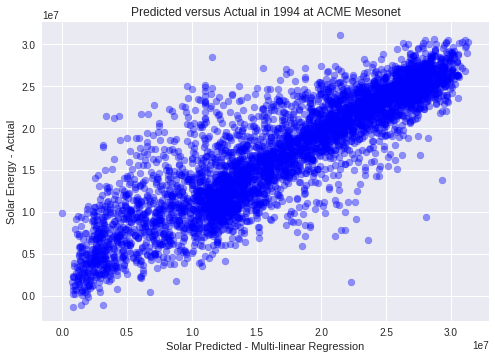

In [53]:
plt.scatter(y_test, predictions,alpha=0.4,color='blue')
plt.xlabel('Solar Predicted - Multi-linear Regression')
plt.ylabel('Solar Energy - Actual')
plt.title('Predicted versus Actual in 1994 at ACME Mesonet')

r2 = metrics.r2_score(y_test, predictions)
print "Cross-Predicted R2:", r2
plt.savefig('ACME_pred_vs_actual.png')
plt.show()
